In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import pyblock

# Manual style for plots
import sys
sys.path.append('../../')
import style
from blockAverage import blockAverage

In [5]:
peptide_colors = ["#FFE4E1","#CD5C5C","#CD2626","#BFEFFF","#00BFFF","#104E8B"]
sys=["pkG","pkA","pkL","pkkg","pkka","pkkl"]
data=[]

for i in sys:
    tmp = pd.read_csv("hb_data/"+i+"_complete.dat",delim_whitespace=True)
    tmp.rename(columns = {'HB_00001[UU]':'inter_count'},inplace=True)
    data.append(tmp.tail(500))

data[0] #pkG
#gen1 = 1100ns in 550 fr
#gen2 = 1000ns in 500fr

,intra_count,inter_count
50,0,7
51,1,4
52,0,6
53,1,6
54,0,3
...,...,...
545,0,5
546,0,6
547,0,8
548,0,9


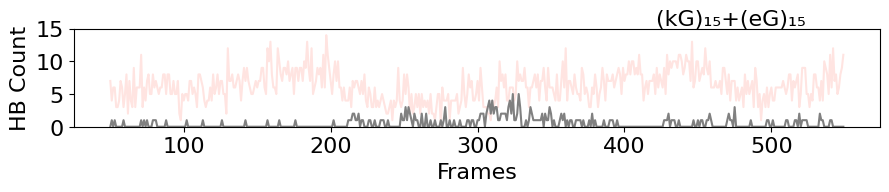

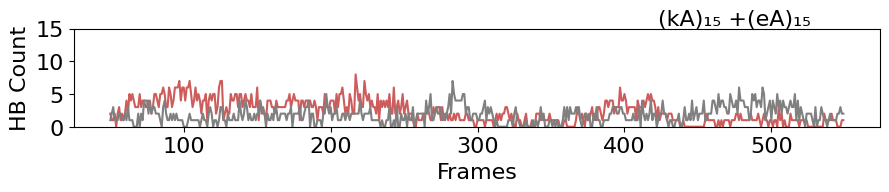

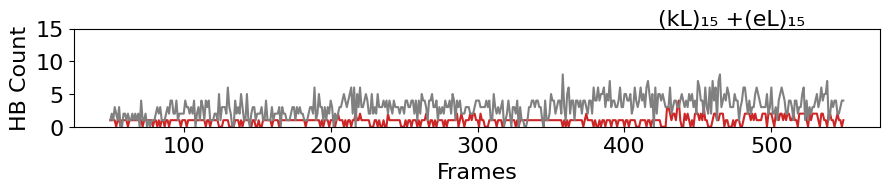

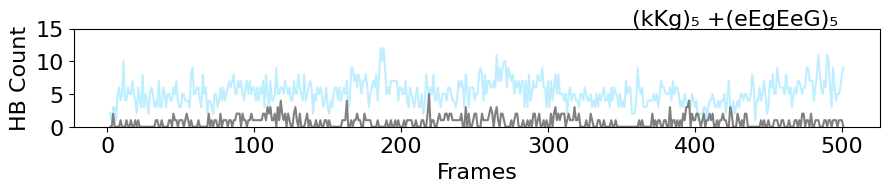

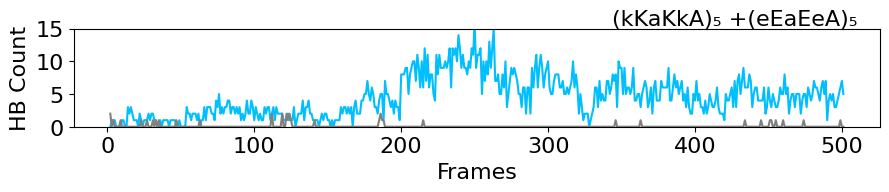

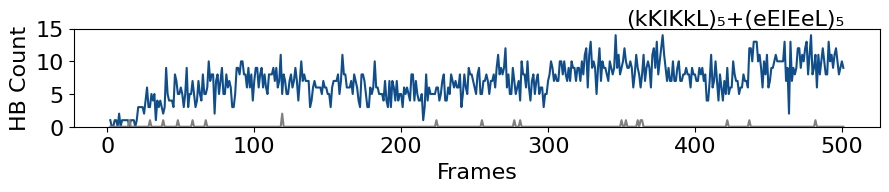

In [6]:
for i in range(6):
    plt.figure(figsize=(9,2))
    plt.plot(data[i]["inter_count"],color=peptide_colors[i])
    plt.plot(data[i]["intra_count"],color='grey')
    
    plt.ylim(0,15)
    plt.title(style.sys_labels[i],y=0.95,x=0.82,fontsize=style.font_size)
    plt.ylabel('HB Count',fontsize=style.font_size)
    plt.xlabel('Frames',fontsize=style.font_size)
    plt.yticks(fontsize=style.font_size)
    plt.xticks(fontsize=style.font_size)
    plt.tight_layout()
    #plt.savefig("HB_series_S_"+str(i)+".png",dpi=600)

<x> = 0.560606 +/- 0.219082

<x> = 1.866162 +/- 0.259020

<x> = 3.287879 +/- 0.325604

<x> = 0.777778 +/- 0.056692

<x> = 0.065657 +/- 0.034625

<x> = 0.035354 +/- 0.006520

<x> = 6.343434 +/- 0.514028

<x> = 1.919192 +/- 0.584158

<x> = 0.964646 +/- 0.107336

<x> = 5.335859 +/- 0.288907

<x> = 5.234848 +/- 1.257210

<x> = 7.585859 +/- 0.732457



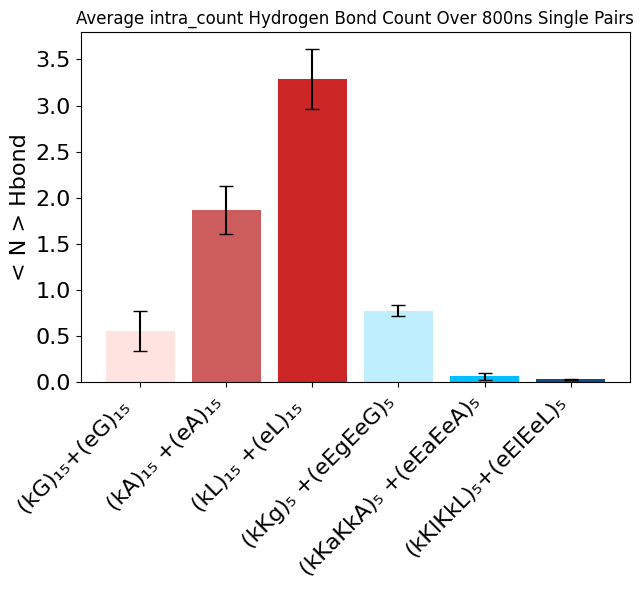

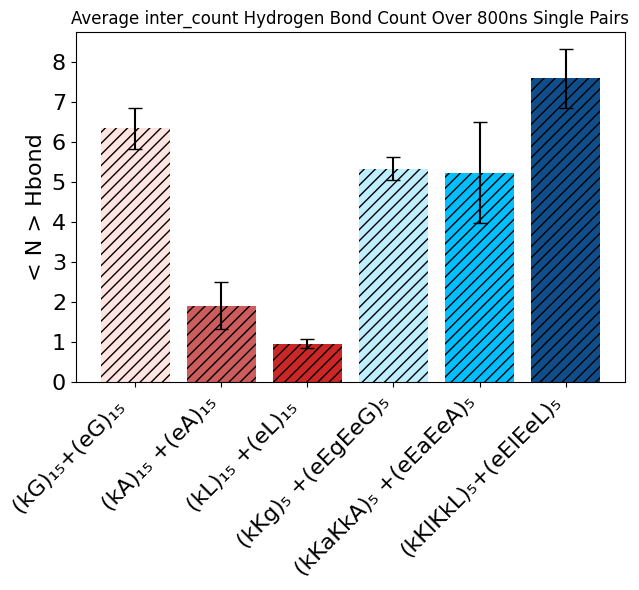

In [8]:
# Hbonding bloack averages w/ python script
data_mean=np.zeros(6)
data_err=np.zeros(6)
hatch_style={"intra_count":'',"inter_count":'///'}

for data_type in ["intra_count","inter_count"]:
    plt.figure(figsize=(6.5,6))
    
    for i in range(6):
        #tmp = data[i]["intra_count"]
        v, blockVar, blockMean = blockAverage(data[i][data_type].tail(400), isplot=False)
        print("<x> = {0:f} +/- {1:f}\n".format(blockMean[-1], np.sqrt(blockVar[-1])))
        data_mean[i] = blockMean[-1]
        data_err[i] = np.sqrt(blockVar[-1])

    plt.bar(style.sys_labels, data_mean,color=peptide_colors, yerr=data_err, capsize=5, hatch=hatch_style[data_type])

    plt.yticks(fontsize = style.font_size)
    plt.xticks(fontsize = style.font_size, rotation=45, ha='right')

    plt.ylabel('< N > Hbond', fontsize = style.font_size)
    plt.title("Average "+data_type+" Hydrogen Bond Count Over 800ns Single Pairs")

    plt.tight_layout()
   #plt.savefig("HB_"+data_type[0:6]+"_S_800ns.png",dpi=600)

<x> = 0.560606 +/- 0.219082

<x> = 6.343434 +/- 0.514028

<x> = 1.866162 +/- 0.259020

<x> = 1.919192 +/- 0.584158

<x> = 3.287879 +/- 0.325604

<x> = 0.964646 +/- 0.107336

<x> = 0.777778 +/- 0.056692

<x> = 5.335859 +/- 0.288907

<x> = 0.065657 +/- 0.034625

<x> = 5.234848 +/- 1.257210

<x> = 0.035354 +/- 0.006520

<x> = 7.585859 +/- 0.732457



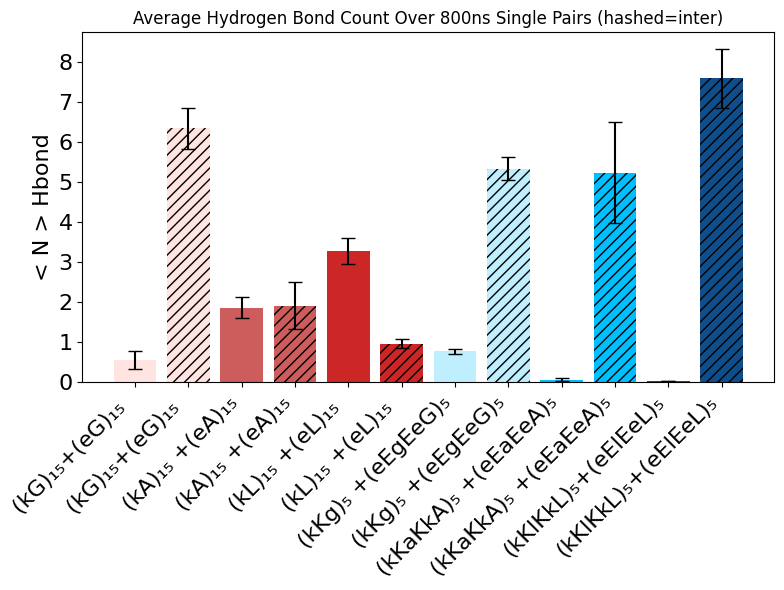

In [9]:
# Hbonding bloack averages w/ python script
data_mean=np.zeros(12)
data_err=np.zeros(12)
bar_c = ['#FFE4E1', '#FFE4E1', '#CD5C5C', '#CD5C5C', '#CD2626', '#CD2626','#BFEFFF','#BFEFFF', '#00BFFF','#00BFFF', '#104E8B', '#104E8B']
bar_l = ['(kG)₁₅+(eG)₁₅ ', '(kG)₁₅+(eG)₁₅ ', '(kA)₁₅ +(eA)₁₅', '(kA)₁₅ +(eA)₁₅', '(kL)₁₅ +(eL)₁₅ ', '(kL)₁₅ +(eL)₁₅ ', '(kKg)₅ +(eEgEeG)₅', '(kKg)₅ +(eEgEeG)₅', '(kKaKkA)₅ +(eEaEeA)₅', '(kKaKkA)₅ +(eEaEeA)₅', '(kKlKkL)₅+(eElEeL)₅', '(kKlKkL)₅+(eElEeL)₅']
hatch_style=['','///']

plt.figure(figsize=(8,6))

c=0
for i in range(6):
    #for data_type in ["intra_count","inter_count"]:
        #tmp = data[i]["intra_count"]
    v, blockVar, blockMean = blockAverage(data[i]["intra_count"].tail(400), isplot=False)
    print("<x> = {0:f} +/- {1:f}\n".format(blockMean[-1], np.sqrt(blockVar[-1])))
    data_mean[c] = blockMean[-1]
    data_err[c] = np.sqrt(blockVar[-1])
    c+=1
    
    v, blockVar, blockMean = blockAverage(data[i]["inter_count"].tail(400), isplot=False)
    print("<x> = {0:f} +/- {1:f}\n".format(blockMean[-1], np.sqrt(blockVar[-1])))
    data_mean[c] = blockMean[-1]
    data_err[c] = np.sqrt(blockVar[-1])
    c+=1
    
        
plt.bar(range(12), data_mean, yerr=data_err, capsize=5,hatch=hatch_style*6,color=bar_c,)

plt.yticks(fontsize = style.font_size)
plt.xticks(ticks=range(12),labels=bar_l,fontsize = style.font_size, rotation=45, ha='right')
plt.ylabel('< N > Hbond', fontsize = style.font_size)
plt.title("Average Hydrogen Bond Count Over 800ns Single Pairs (hashed=inter)")

plt.tight_layout()
#plt.savefig("HB_"+data_type[0:6]+"_S_800ns.png",dpi=600)

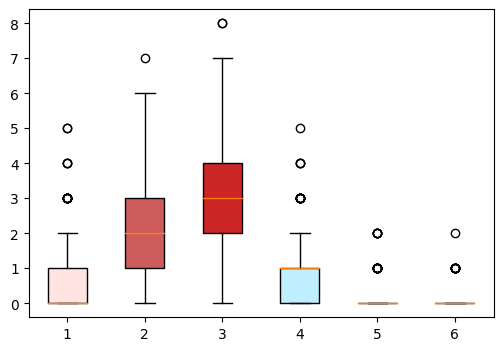

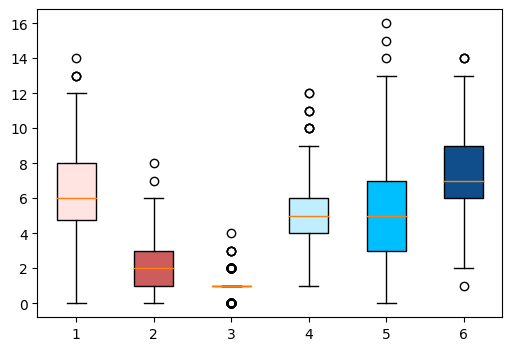

In [10]:
df_inter=[]
df_intra=[]

for i in range(6):
    tmp1=data[i]["inter_count"].tail(400)
    tmp2=data[i]["intra_count"].tail(400)
    df_inter.append(tmp1)
    df_intra.append(tmp2)

for df in (df_intra, df_inter):
    plt.figure(figsize=(6,4))
    bplot = plt.boxplot(df, patch_artist=True)
    
    # fill with colors
    for patch, color in zip(bplot['boxes'], style.color_arr):
        patch.set_facecolor(color)

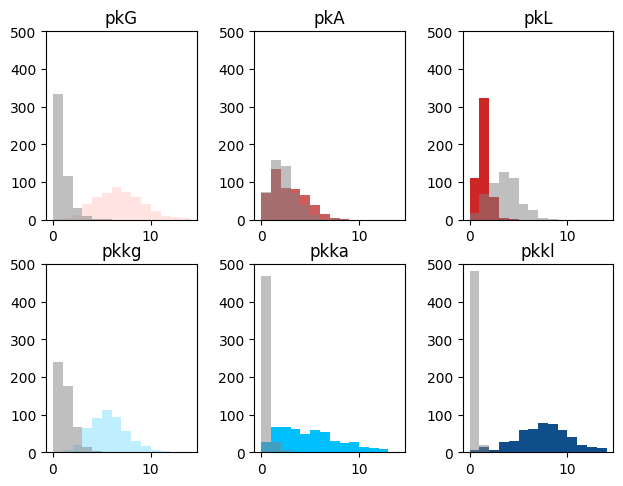

In [11]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 3)
figure.tight_layout()

count=0
for i in range(2):
    for j in range(3):
        #axis[i, j].set_xlim(-1,10)
        axis[i, j].hist(data[count]["inter_count"], bins=range(15), color=peptide_colors[count])
        axis[i, j].hist(data[count]["intra_count"], bins=range(15), color="grey", alpha=0.5)
        axis[i, j].set_ylim(0,500)
        axis[i, j].set_title(sys[count])
        count+=1